In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv("ADANIPORTS.csv")
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
print(df.isnull().sum())

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


In [11]:
#Handle missing values in 'Trades' (we will fill it with mean)
df['Trades'] = df['Trades'].fillna(df['Trades'].mean())

In [13]:
# Sort data by Date
df = df.sort_values(by = 'Date')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              3322 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

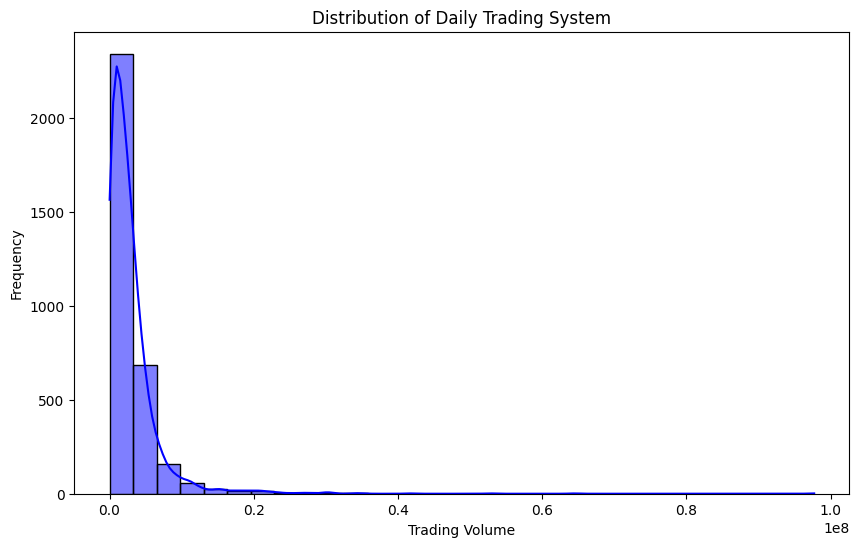

In [19]:
#Daily Trading Volume Distribution
plt.figure(figsize = (10,6))
sns.histplot(df['Volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Trading System')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14248\1111755476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deliverable.values, y=deliverable.index, palette='coolwarm')


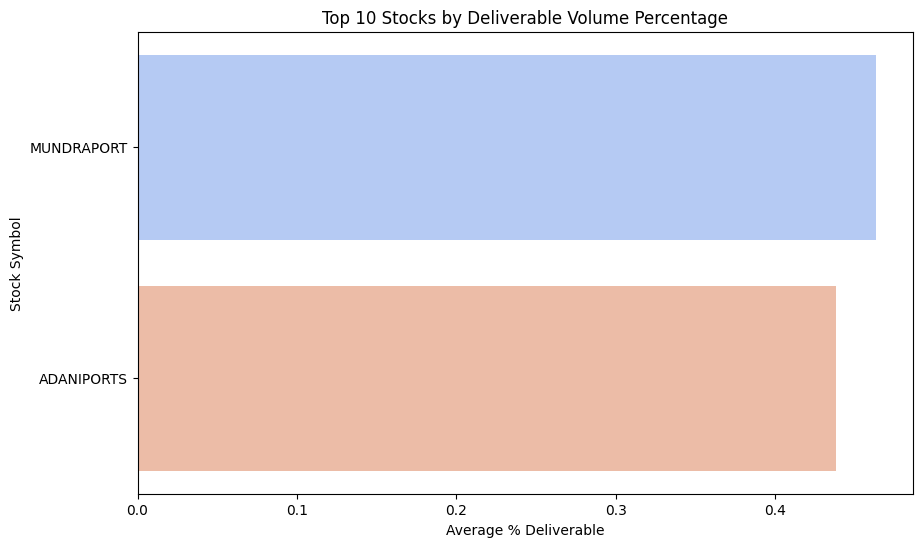

In [18]:
#Percentage Deliverable Volume Across Stocks
deliverable = df.groupby('Symbol')['%Deliverble'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=deliverable.values, y=deliverable.index, palette='coolwarm')
plt.title('Top 10 Stocks by Deliverable Volume Percentage')
plt.xlabel('Average % Deliverable')
plt.ylabel('Stock Symbol')
plt.show()

In [20]:
# Correlation Heatmap for Numerical Columns
# Check the data types of all columns
print(df.dtypes)

# Check for non-numeric values in each column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique()[:10])  # Display unique values (first 10) to spot issues

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object
Column: Date
<DatetimeArray>
['2007-11-27 00:00:00', '2007-11-28 00:00:00', '2007-11-29 00:00:00',
 '2007-11-30 00:00:00', '2007-12-03 00:00:00', '2007-12-04 00:00:00',
 '2007-12-05 00:00:00', '2007-12-06 00:00:00', '2007-12-07 00:00:00',
 '2007-12-10 00:00:00']
Length: 10, dtype: datetime64[ns]
Column: Symbol
['MUNDRAPORT' 'ADANIPORTS']
Column: Series
['EQ']
Column: Prev Close
[ 440.    962.9   893.9   884.2   921.55  969.3  1

In [21]:
# Convert numeric columns, coercing errors to NaN
numeric_cols = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with invalid data in numeric columns (optional)
df = df.dropna(subset=numeric_cols)


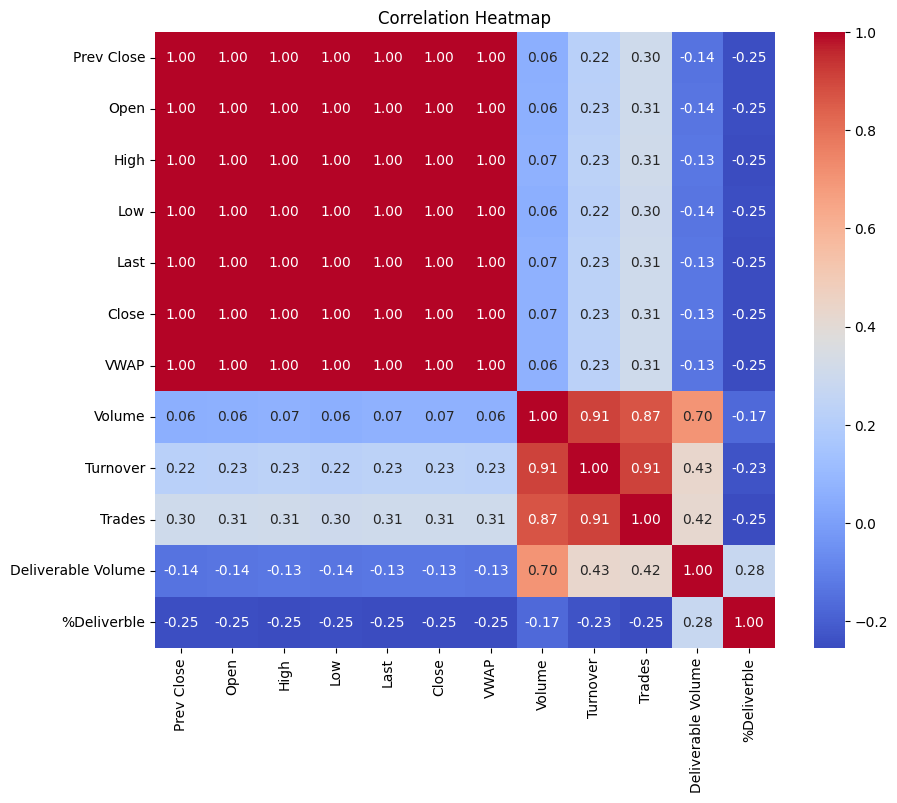

In [22]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


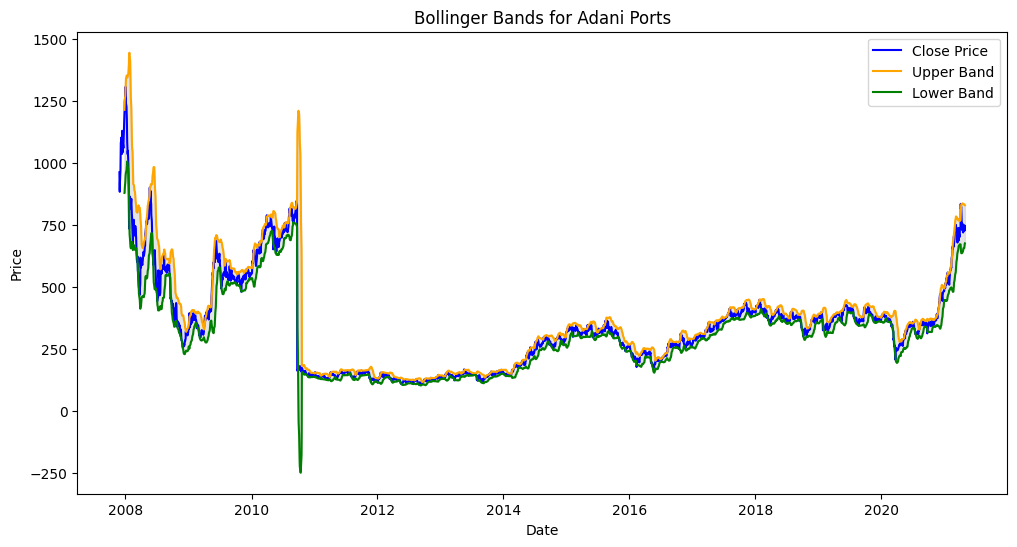

In [23]:
# Bollinger Bands Calculation
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['MA_20'] + 2 * df['Close'].rolling(20).std()
df['Lower_Band'] = df['MA_20'] - 2 * df['Close'].rolling(20).std()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band', color='orange')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band', color='green')
plt.fill_between(df['Date'], df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.2)
plt.title('Bollinger Bands for Adani Ports')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


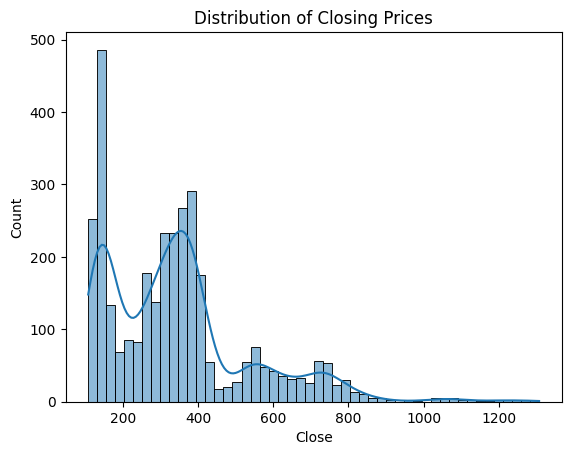

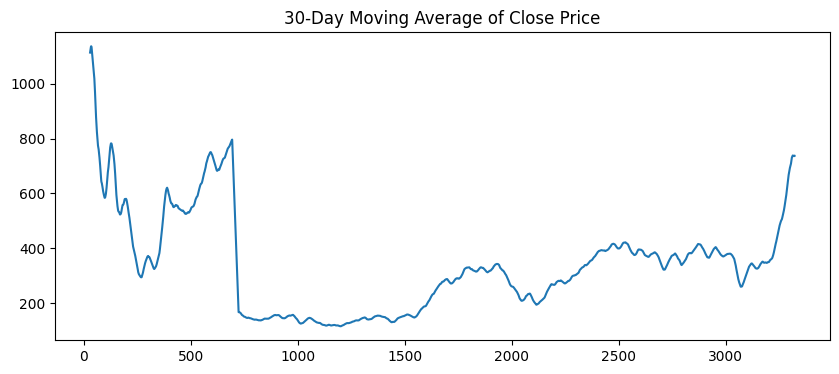

In [24]:
# Distribution of Closing Prices
sns.histplot(df['Close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

# Rolling mean visualization
df['Close'].rolling(30).mean().plot(figsize=(10,4), title="30-Day Moving Average of Close Price")
plt.show()


In [25]:
# ### EDA Summary
# - Data spans from 2000 to 2021 with no missing values in key price columns.
# - Prices show a long-term upward trend with cyclical fluctuations.
# - Volume spikes indicate major trading activity periods.
# - High correlation between Open, High, Low, and Close, suggesting co-movement of prices.

In [26]:
# # Step 2: Feature Engineering

# In this step, we derive new features from the cleaned stock data that will help predict volatility.  
# Financial data is highly temporal, so we calculate features like **daily returns**, **rolling volatility**, and **moving averages** to capture both short-term and long-term price dynamics.

In [27]:
import numpy as np

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate 5-day rolling volatility (standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=5).std()

# Create moving averages to capture trend
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

# Drop NA values (caused by rolling calculations)
df = df.dropna().reset_index(drop=True)

# Display first few rows of engineered data
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,MA_20,Upper_Band,Lower_Band,Return,Volatility,MA10,MA30
0,2008-01-09,MUNDRAPORT,EQ,1204.80,1200.0,1210.0,1151.00,1181.0,1180.25,1176.37,...,44922.588355,259280,0.4132,1169.5100,1352.999855,986.020145,-0.020377,0.006523,1246.230,1113.501667
1,2008-01-10,MUNDRAPORT,EQ,1180.25,1185.0,1199.8,1110.00,1118.0,1121.55,1156.44,...,44922.588355,200150,0.4561,1173.2050,1349.185109,997.224891,-0.049735,0.014948,1237.220,1118.790000
2,2008-01-11,MUNDRAPORT,EQ,1121.55,1128.0,1130.0,1063.00,1096.0,1085.85,1087.78,...,44922.588355,312121,0.5059,1175.6575,1344.870552,1006.444448,-0.031831,0.015220,1220.895,1125.188333
3,2008-01-14,MUNDRAPORT,EQ,1085.85,1082.4,1082.4,1031.10,1035.0,1035.15,1042.40,...,44922.588355,570824,0.6829,1170.9175,1350.514037,991.320963,-0.046692,0.014524,1197.530,1130.220000
4,2008-01-15,MUNDRAPORT,EQ,1035.15,1045.6,1078.7,1036.05,1057.0,1049.55,1050.69,...,44922.588355,504259,0.6072,1167.8700,1353.742000,981.998000,0.013911,0.025717,1172.800,1134.486667


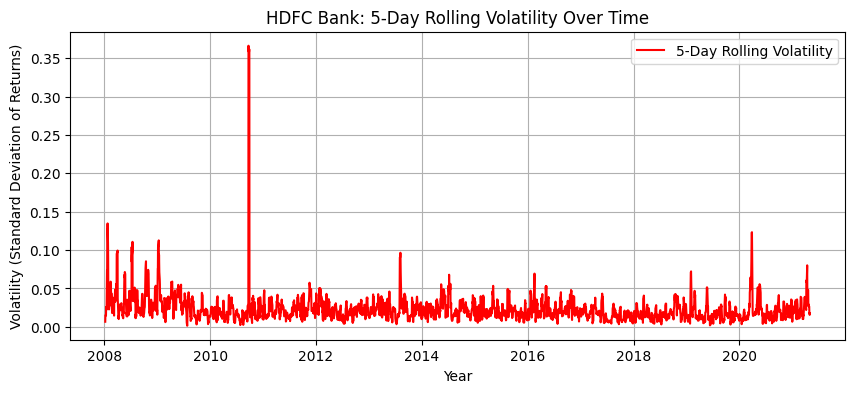

In [28]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Volatility'], color='red', label='5-Day Rolling Volatility')
plt.title("HDFC Bank: 5-Day Rolling Volatility Over Time")
plt.xlabel("Year")
plt.ylabel("Volatility (Standard Deviation of Returns)")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
### Feature Engineering Summary

# - Return: Percentage change in closing price from the previous day; measures relative price movement.
# - Volatility: Standard deviation of 5-day returns, representing short-term market risk.  
# - MA10 & MA30: Capture short-term and long-term trends in stock prices.  
# - Observation: Volatility spikes correspond to major market downturns, such as during 2008 (global financial crisis) and 2020 (COVID-19 market shock).  
# - These features collectively represent both the magnitude of price movement and its variability — ideal for volatility prediction models.

In [30]:
# # Step 3: Model Building and Evaluation

# With the features prepared, we now build and evaluate two predictive models:
# 1. Linear Regression — a simple, interpretable model assuming linear relationships.
# 2. Random Forest Regressor — an ensemble model that can capture nonlinear relationships and interactions.

# The models will predict short-term volatility based on returns, moving averages, and volume changes.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature set (independent variables)
X = df[['Return', 'MA10', 'MA30', 'Volume']]
y = df['Volatility']

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale numerical features for regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print(f"MAE: {mae_lr:.6f}")
print(f"MSE: {mse_lr:.6f}")
print(f"R²:  {r2_lr:.4f}")


Linear Regression Results
MAE: 0.010960
MSE: 0.000204
R²:  0.0475


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"MAE: {mae_rf:.6f}")
print(f"MSE: {mse_rf:.6f}")
print(f"R²:  {r2_rf:.4f}")


Random Forest Results
MAE: 0.009232
MSE: 0.000202
R²:  0.0535


,Model,MAE,MSE,R²
0,Linear Regression,0.010960,0.000204,0.047511
1,Random Forest,0.009232,0.000202,0.053518


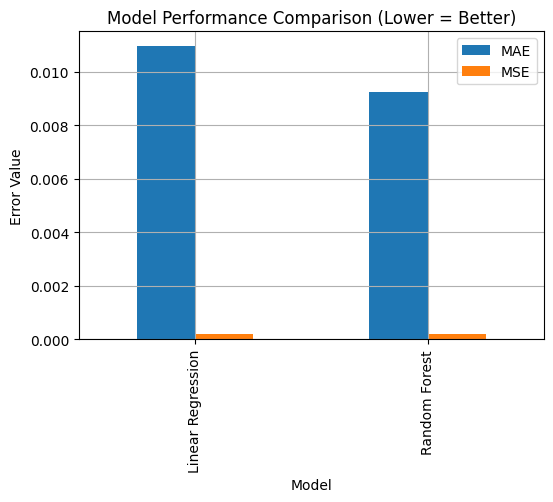

In [35]:
# Combine results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'MSE': [mse_lr, mse_rf],
    'R²': [r2_lr, r2_rf]
})
display(results)

# Plot comparison
results.set_index('Model')[['MAE', 'MSE']].plot(kind='bar', figsize=(6,4))
plt.title("Model Performance Comparison (Lower = Better)")
plt.ylabel("Error Value")
plt.grid(True)
plt.show()


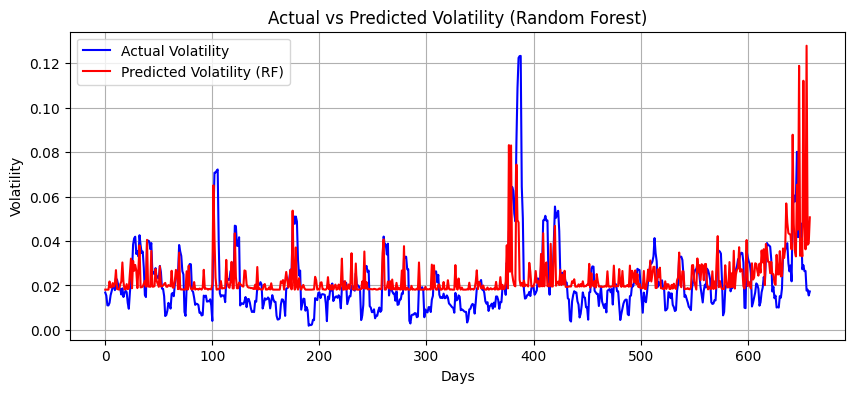

In [36]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual Volatility", color='blue')
plt.plot(y_pred_rf, label="Predicted Volatility (RF)", color='red')
plt.title("Actual vs Predicted Volatility (Random Forest)")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()
